### Skeleton Code for Semi-Synthetic datasets in OpenML 
### Example: https://www.openml.org/d/21

In [1]:
import pickle
import gzip
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# # Summary of Dataset Information
# data_info = {'ID': [21, 23, 26, 31, 50, 151, 155, 183, 184, 292, 333, 334, 335, 351, 354, 375,
#             469, 475, 679, 720, 741, 825, 826, 872, 881, 915, 923, 934, 959, 983, 991, 
#             1014, 1169, 1216, 1217, 1218, 1235, 1236, 1237, 1470, 1481, 1483, 1498, 
#             1557, 1568, 4135, 4552], 
#             "sensitive attribute": ['buying', 'Wifes_education', 'parents', 'checking_status', 'top-left-square', 'day', 's1', 'Sex', 'white_king_row', 'Y',
#                                   'class', 'class', 'class', 'Y', 'Y', 'speaker', 'DMFT.Begin', 'Time_of_survey', 'sleep_state', 'Sex',
#                                   'sleep_state', 'RAD', 'Occasion', 'RAD', 'x3', 'SMOKSTAT', 'isns', 'family_structure', 'parents', 'Wifes_education',
#                                   'buying', 'DMFT.Begin', 'Airline', 'click', 'click', 'click', 'elevel', 'size', 'size', 'V2',
#                                   'V3', 'V1', 'V5', 'V1', 'V1', 'RESOURCE', 'V1'], 
#             "label": ['class', 'Contraceptive_method_used', 'class', 'class', 'Class', 'class', 'class', 'Class_number_of_rings', 'game', 'X1',
#                                   'attr1', 'attr1', 'attr1', 'X1', 'X1', 'utterance', 'Prevention', 'Political_system', 'temperature', 'binaryClass',
#                                   'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass', 'binaryClass',
#                                   'binaryClass', 'binaryClass', 'Delay', 'impression', 'impression', 'impression', 'class', 'class', 'class', 'Class',
#                                   'Class', 'Class', 'Class', 'Class', 'Class', 'target', 'V17'],
#             "link": ["https://www.openml.org/data/get_csv/" + string for string in ["21/dataset_21_car.arff", "23/dataset_23_cmc.arff", "26/dataset_26_nursery.arff", "31/dataset_31_credit-g.arff", "50/dataset_50_tic-tac-toe.arff", "2419/electricity-normalized.arff", "2423/pokerhand-normalized.arff", "3620/dataset_187_abalone.arff", "3621/dataset_188_kropt.arff", "49822/australian.arff", 
#                                                                              "52236/phpAyyBys", "52237/php4fATLZ", "52238/phphZierv", "52254/php89ntbG", "52257/phpQfR7GF", "52415/JapaneseVowels.arff", "52581/analcatdata_dmft.arff", "52587/analcatdata_germangss.arff", "52979/rmftsa_sleepdata.arff", "53254/abalone.arff",
#                                                                              "53275/rmftsa_sleepdata.arff", "53359/boston_corrected.arff", "53360/sensory.arff", "53406/boston.arff", "53415/mv.arff", "53449/plasma_retinol.arff", "53457/visualizing_soil.arff", "53468/socmob.arff", "53493/nursery.arff", "53517/cmc.arff",
#                                                                              "53525/car.arff", "53548/analcatdata_dmft.arff", "66526/phpvcoG8S", "183030/phppCF8Zy", "183039/phpLV1N3m", "183150/phpqZOQcc", "520800/Agrawal1.arff", "520801/Stagger1.arff", "520802/Stagger2.arff", "1586239/phpce61nO",
#                                                                              "1590570/php7zhUPY", "1590940/phpH4DHsK", "1592290/phpgNaXZe", "1593753/phpfUae7X", "1675984/phpfrJpBS", "1681098/phpmPOD5A", "1798821/php0mZlkF"]]
#             }

In [3]:
# pickle_file = '../Shannon/datasets_parsed.pickle'
# with open(pickle_file, "rb") as input_file:
#     datasets = pickle.load(input_file)

# n_samples = []
# n_features = []
# for key in datasets.keys():
#     n_samples.append(min(datasets[key]["X0"].shape[0], datasets[key]["X1"].shape[0]))
#     n_features.append(datasets[key]["X0"].shape[1])

In [2]:
# pickle_file = '../Shannon/openml_divergence_log_2020-01-30-14.55.14.txt.pickle'
pickle_file = '../Shannon/openml_divergence_log_2020-05-11-19.07.59.txt.pickle'
with open(pickle_file, "rb") as input_file:
    data = pickle.load(input_file)
TV_train = data['TV_train']
TV_test = data['TV_test']

In [5]:
pickle_file = '../Shannon/openml_divergence_emp_log_2020-01-30-17.16.42.txt.pickle'
with open(pickle_file, "rb") as input_file:
    data = pickle.load(input_file)
TV_emp = data['TV_emp']

In [6]:
for i in range(len(TV_emp)):
    if TV_test[i] == 0:
        TV_test[i] = TV_emp[i]

In [5]:
# Empirical estimation of the TV
# pickle_file = '../Shannon/openml_divergence_emp_log_2020-01-30-17.16.42.txt.pickle'
# with open(pickle_file, "rb") as input_file:
#     data = pickle.load(input_file)
# TV_train = data['TV_emp']

In [7]:
# pickle_file = '../Shannon/openml_log_2020-01-30-15.11.36.txt.pickle'
pickle_file = '../Shannon/openml_log_2020-01-31-10.54.35.txt.pickle'
with open(pickle_file, "rb") as input_file:
    data = pickle.load(input_file)
group_blind_loss = data['group_blind_loss']
disagreement_max = data['disagreement_max']
disagreement_min = data['disagreement_min']
decoupling0_train = data['decoupling0_train']
decoupling1_train = data['decoupling1_train']
decoupling0_test = data['decoupling0_test']
decoupling1_test = data['decoupling1_test']
omega = data['omega']
data_id = data['data_id']
n_samples = data['n_samples']

In [11]:
epsilon_list = []
upper_bound_list = []
lower_bound_list = []
n_samples_list = []
ID_list = []
omega_list = []
TV_list = []
d_min_list = []
d_max_list = []

for i in range(len(TV_train)):
#     if TV_train[i] > .3:
#         continue;
#     if omega[i] > .5:
#         continue;
    
    epsilon = group_blind_loss[i] - max(decoupling0_test[i], decoupling1_test[i])
    upper_bound = disagreement_min[i] + omega[i]
#     upper_bound = disagreement_min[i]
#     lower_bound = .5*disagreement_max[i] - TV[i] - 1.5*(decoupling0_train[i]+decoupling1_train[i]) - omega[i]
    lower_bound = .5*disagreement_max[i] - TV_test[i] - omega[i]
#     lower_bound = .5*disagreement_max[i] - TV[i]
    
#     if (epsilon > upper_bound) or (epsilon < lower_bound):
#         continue;
    
    epsilon_list.append(epsilon)
    upper_bound_list.append(upper_bound)
    lower_bound_list.append(lower_bound)
    n_samples_list.append(n_samples[i])
    ID_list.append(data_id[i])
    omega_list.append(omega[i])
    TV_list.append(TV_test[i])
    d_min_list.append(disagreement_min[i])
    d_max_list.append(disagreement_max[i])
    
epsilon_list = np.array(epsilon_list)
upper_bound_list = np.array(upper_bound_list)
lower_bound_list = np.array(lower_bound_list)
ID_list = np.array(ID_list)
n_samples_list = np.array(n_samples_list)
omega_list = np.array(omega_list)
TV_list = np.array(TV_list)
d_min_list = np.array(d_min_list)
d_max_list = np.array(d_max_list)

In [12]:
print(omega_list.shape[0])

85


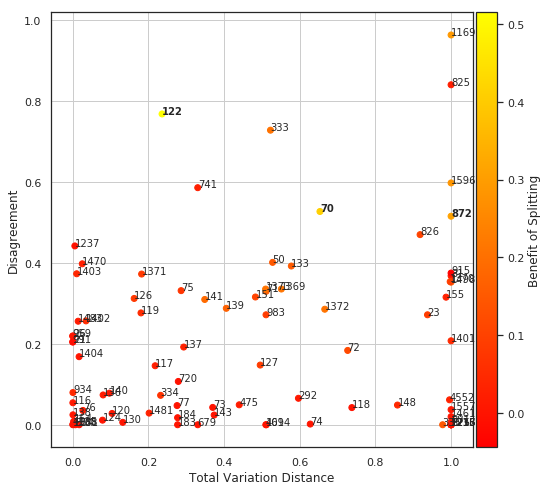

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.scatter(TV_list, d_max_list, c = epsilon_list, cmap='autumn')
for i in range(len(TV_list)):
    if epsilon_list[i] > .3:
        ax.text(TV_list[i], d_max_list[i], str(ID_list[i]), fontweight='bold')
    else:
        ax.text(TV_list[i], d_max_list[i], str(ID_list[i]))
    
ax.grid()
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_xlabel('Total Variation Distance')
ax.set_ylabel('Disagreement')
cax.set_ylabel('Benefit of Splitting');

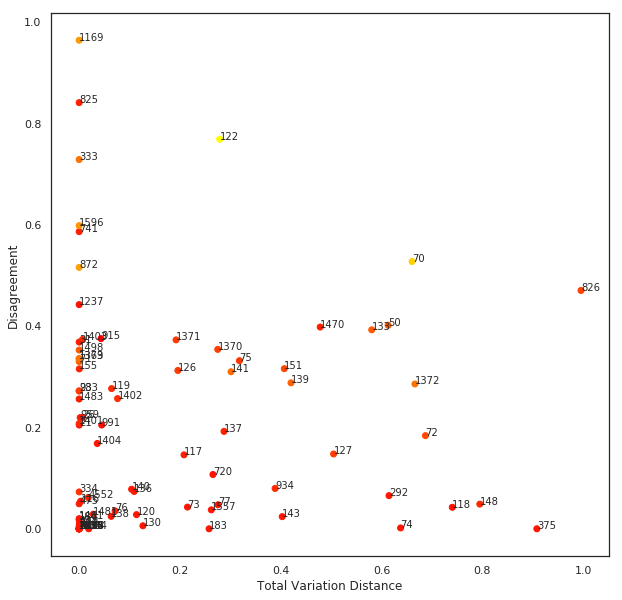

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(TV_list, d_max_list, c = epsilon_list)
for i in range(len(TV_list)):
    plt.text(TV_list[i], d_max_list[i], str(ID_list[i]))
plt.xlabel('Total Variation Distance')
plt.ylabel('Disagreement')
plt.autumn()

In [12]:
### For rebuttal
print(ID_list.tolist().index(1169))
print(epsilon_list[31], lower_bound_list[31], d_max_list[31], omega_list[31], TV_list[31], n_samples_list[31])

31
0.2904100304981363 0.2909237053929705 0.9635409277911761 0.19084675850261754 0.0 10000


In [9]:
sample_idx = np.argsort(n_samples_list)

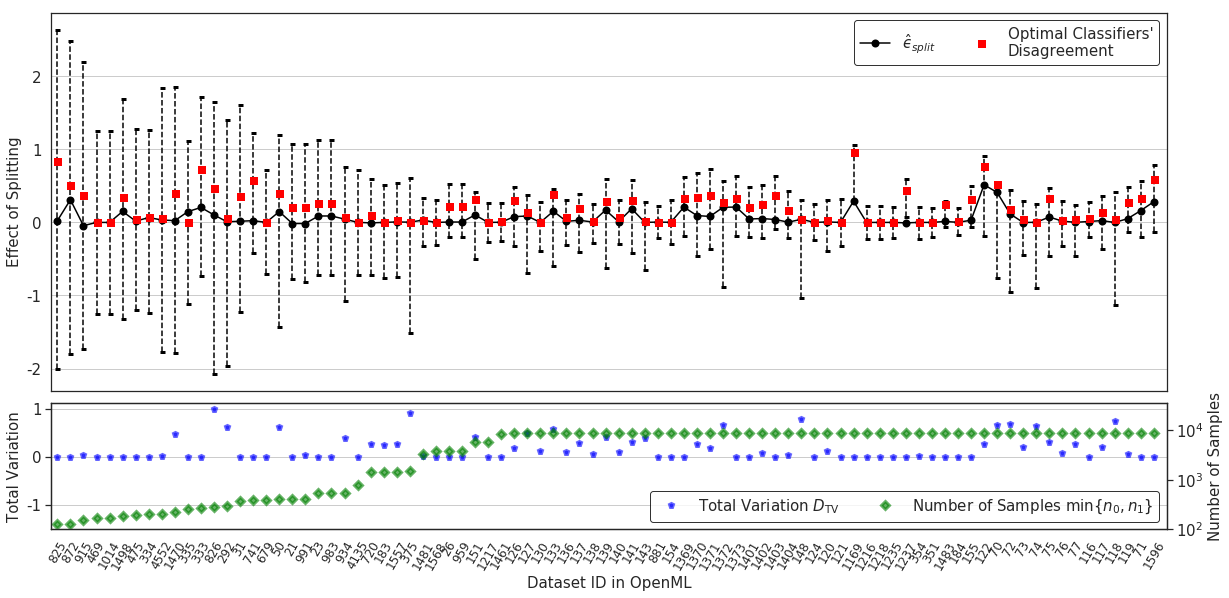

In [12]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05}, 
                       figsize=(20, 9.5))
fs = 15
ms = 5
mw = 3

# plt.subplots_adjust(hspace = .01, wspace=.01)

ax[0].grid(axis='y')

# epsilon and bounds
for i in range(len(sample_idx)):
    ax[0].plot([i, i], [lower_bound_list[sample_idx[i]], upper_bound_list[sample_idx[i]]], 
             color='black', marker='', linestyle='--')

ln1 = ax[0].plot(np.arange(len(sample_idx)), epsilon_list[sample_idx], 
         color='black', marker='o', linestyle='-', markersize=ms, markeredgewidth=mw, 
         label=r'$\hat{ϵ}_{split}$');
ax[0].plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);
ax[0].plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);

# disagreement
ln2 = ax[0].plot(np.arange(len(sample_idx)), d_max_list[sample_idx], 
         color='red', marker='s', linestyle='', markersize=ms, markeredgewidth=mw, 
         label='Optimal Classifiers\'\nDisagreement')
# plt.plot(np.arange(len(sample_idx)), d_max_list[sample_idx], label='Disagreement_max')


ax[0].set_xticklabels([]);
# ax[0].set_xticks(np.arange(len(sample_idx)))
# ax[0].set_xticklabels(ID_list[sample_idx], rotation=45, fontsize=fs-3);
# ax[0].set_xlabel('Dataset ID in OpenML', fontsize=fs);


ax[0].set_ylabel('Effect of Splitting', fontsize=fs);
ax[0].set_xlim(0-.5, omega_list.shape[0])

ax[0].set_yticks(np.arange(-2, 3))
ax[0].set_yticklabels(np.arange(-2, 3), fontsize=fs);
ax[0].legend(loc='upper right', fontsize=fs, fancybox=True, ncol=4, edgecolor='black')

ax[1].grid(axis='y')
# TV
ln3 = ax[1].plot(np.arange(len(sample_idx)), TV_list[sample_idx], 
         color='blue', marker='p', linestyle='', markersize=ms, markeredgewidth=mw, alpha=.6, 
         label=r'Total Variation $D_\mathsf{TV}$')

ax2 = ax[1].twinx()
# sample size
m = np.log10(n_samples_list[sample_idx]).mean()
ln4 = ax[1].plot(np.arange(len(sample_idx)), np.log10(n_samples_list[sample_idx])-m, 
         color='green', marker='D', linestyle='', markersize=ms, markeredgewidth=mw, alpha=.6,
         label=r'Number of Samples $\min\{n_0, n_1\}$')


ax[1].set_xlim(0-.5, omega_list.shape[0])
ax[1].set_xticks(np.arange(len(sample_idx)))
ax[1].set_xticklabels(ID_list[sample_idx], rotation=60, fontsize=fs-3);
ax[1].set_xlabel('Dataset ID in OpenML', fontsize=fs);

ax[1].set_yticks(np.arange(-1, 2))
ax[1].set_yticklabels(np.arange(-1, 2), fontsize=fs);
ax[1].set_ylabel('Total Variation', fontsize=fs)

n_ytick_2 = 3
ax2.set_yticks(np.linspace(np.log10(n_samples_list[sample_idx]).min()-m, 
                           np.log10(n_samples_list[sample_idx]).max()-m, n_ytick_2))
ytl = [ r'$10^{:.0f}$'.format(i) for i in np.linspace(np.log10(n_samples_list[sample_idx].min()), np.log10(n_samples_list[sample_idx].max()), n_ytick_2)]
ax2.set_yticklabels(ytl, fontsize=fs)
ax2.set_ylabel('Number of Samples', fontsize=fs);

ln = ln3+ln4
labs = [l.get_label() for l in ln]
ax[1].legend(ln, labs, loc='lower right', fontsize=fs, fancybox=True, ncol=4, edgecolor='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('epsilon.jpg', format='jpg', dpi=300)

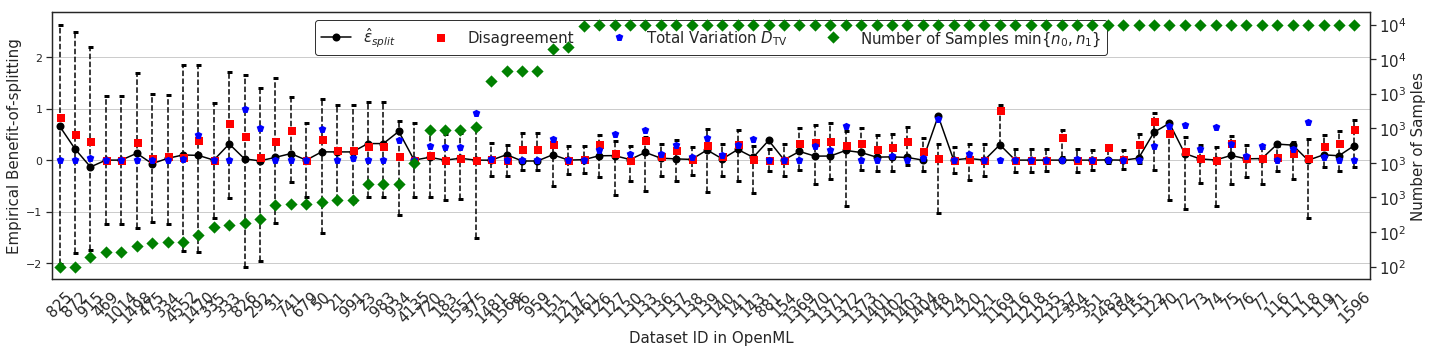

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 5))
fs = 15
ms = 5
mw = 3

ax1.grid(axis='y')

# epsilon and bounds
for i in range(len(sample_idx)):
    ax1.plot([i, i], [lower_bound_list[sample_idx[i]], upper_bound_list[sample_idx[i]]], 
             color='black', marker='', linestyle='--')

ln1 = ax1.plot(np.arange(len(sample_idx)), epsilon_list[sample_idx], 
         color='black', marker='o', linestyle='-', markersize=ms, markeredgewidth=mw, 
         label=r'$\hat{\epsilon}_{split}$');
ax1.plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);
ax1.plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);

# disagreement
ln2 = ax1.plot(np.arange(len(sample_idx)), d_max_list[sample_idx], 
         color='red', marker='s', linestyle='', markersize=ms, markeredgewidth=mw, 
         label='Disagreement')
# plt.plot(np.arange(len(sample_idx)), d_max_list[sample_idx], label='Disagreement_max')

# TV
ln3 = ax1.plot(np.arange(len(sample_idx)), TV_list[sample_idx], 
         color='blue', marker='p', linestyle='', markersize=ms, markeredgewidth=mw, 
         label=r'Total Variation $D_\mathsf{TV}$')

ax1.set_xticks(np.arange(len(sample_idx)))
ax1.set_xticklabels(ID_list[sample_idx], rotation=45, fontsize=fs);
# ax1.set_yticklabels(fontsize=fs);

ax1.set_xlabel('Dataset ID in OpenML', fontsize=fs);
ax1.set_ylabel('Empirical Benefit-of-splitting', fontsize=fs);
ax1.set_xlim(0-.5, omega_list.shape[0])

ax2 = ax1.twinx()
# sample size
m = np.log10(n_samples_list[sample_idx]).mean()
ln4 = ax2.plot(np.arange(len(sample_idx)), np.log10(n_samples_list[sample_idx])-m, 
         color='green', marker='D', linestyle='', markersize=ms, markeredgewidth=mw,
         label=r'Number of Samples $\min\{n_0, n_1\}$')


ax2.set_ylabel('Number of Samples', fontsize=fs);
n_ytick_2 = 8

ax2.set_yticks(np.linspace(np.log10(n_samples_list[sample_idx]).min()-m, 
                           np.log10(n_samples_list[sample_idx]).max()-m, n_ytick_2))
ytl = [ r'$10^{:.0f}$'.format(i) for i in np.linspace(np.log10(n_samples_list[sample_idx].min()), np.log10(n_samples_list[sample_idx].max()), n_ytick_2)]
ax2.set_yticklabels(ytl, fontsize=fs)

ln = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in ln]
ax1.legend(ln, labs, loc='upper center', fontsize=fs, fancybox=True, ncol=4, edgecolor='black')
plt.tight_layout()
# plt.savefig('epsilon.jpg', format='jpg', dpi=300)

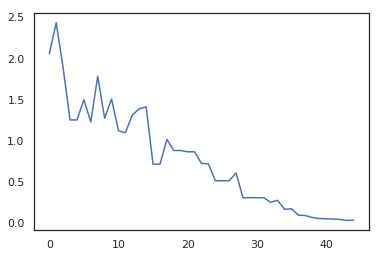

In [15]:
plt.plot(np.arange(len(sample_idx)), omega_list[sample_idx])

In [13]:
print(np.array(TV_train)[sample_idx])
print(np.array(TV_test)[sample_idx])

[2.83358067e-01 9.57446694e-02 0.00000000e+00 5.83169043e-01
 5.75865090e-01 0.00000000e+00 9.15492624e-02 0.00000000e+00
 2.53478080e-01 4.86170083e-01 1.55318677e-01 4.50625241e-01
 9.96917307e-01 6.10211730e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.19299531e-01 3.62099111e-02 3.06671858e-02
 0.00000000e+00 0.00000000e+00 3.78328621e-01 5.41402102e-02
 2.67278790e-01 2.65837997e-01 2.60843396e-01 9.14095402e-01
 8.62449408e-04 0.00000000e+00 3.88821959e-03 4.23463434e-03
 4.31634575e-01 0.00000000e+00 2.79591858e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.70390034e-05 8.92356038e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.99784946e-05
 0.00000000e+00]
[1.93284929e-01 2.63157785e-02 0.00000000e+00 5.10310411e-01
 5.11585891e-01 0.00000000e+00 3.58955860e-02 0.00000000e+00
 1.03276148e-02 4.11030501e-02 1.47455096e-01 5.82928061e-01
 9.78017151e-01 6.17433488e-01 0.00000000e+00 0.00000000e+00
 2.27373675e-13 5.30290961e-01 0.00000000e+00 0.00000000e+00
 0.0000

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

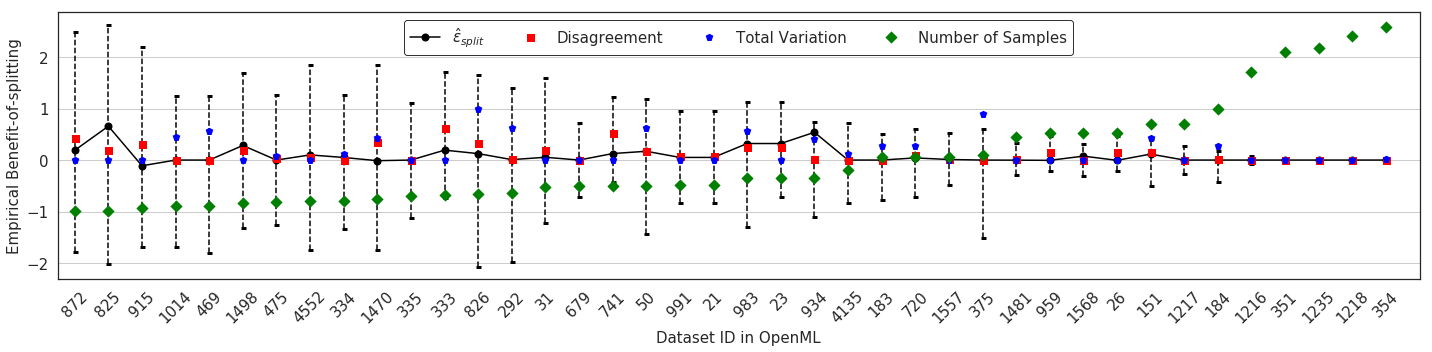

In [35]:
fig = plt.figure(figsize=(20, 5));
fs = 15
ms = 5
mw = 3

# epsilon and bounds
for i in range(len(sample_idx)):
    plt.plot([i, i], [lower_bound_list[sample_idx[i]], upper_bound_list[sample_idx[i]]], 
             color='black', marker='', linestyle='--')

plt.plot(np.arange(len(sample_idx)), epsilon_list[sample_idx], 
         color='black', marker='o', linestyle='-', markersize=ms, markeredgewidth=mw, 
         label=r'$\hat{\epsilon}_{split}$');
plt.plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);
plt.plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 
         color='black', marker='_', linestyle='', markersize=ms, markeredgewidth=mw);

# disagreement
plt.plot(np.arange(len(sample_idx)), d_min_list[sample_idx], 
         color='red', marker='s', linestyle='', markersize=ms, markeredgewidth=mw, 
         label='Disagreement')
# plt.plot(np.arange(len(sample_idx)), d_max_list[sample_idx], label='Disagreement_max')

# TV
plt.plot(np.arange(len(sample_idx)), TV_list[sample_idx], 
         color='blue', marker='p', linestyle='', markersize=ms, markeredgewidth=mw, 
         label='Total Variation')

# sample size
plt.plot(np.arange(len(sample_idx)), np.log10(n_samples_list[sample_idx])-np.log10(n_samples_list[sample_idx]).mean(), 
         color='green', marker='D', linestyle='', markersize=ms, markeredgewidth=mw,
         label='Number of Samples')

# ax = fig.add_subplot(111)
# ax.yaxis.tick_right()


plt.xticks(np.arange(len(sample_idx)), ID_list[sample_idx], 
           rotation=45, fontsize=fs);
plt.yticks(fontsize=fs);

plt.xlabel('Dataset ID in OpenML', fontsize=fs);
plt.ylabel('Empirical Benefit-of-splitting', fontsize=fs);
plt.grid(axis='y')
plt.xlim(0-.5, omega_list.shape[0])
plt.legend(loc='upper center', fontsize=fs, fancybox=True, ncol=4, edgecolor='black')
plt.tight_layout()
# plt.savefig('epsilon.jpg', format='jpg', dpi=300)

In [27]:
np.log(10)

2.302585092994046

In [253]:
omega_list[sample_idx]

array([2.88101794, 2.43254716, 2.22851819, 1.4767159 , 1.4767159 ,
       1.75520777, 1.45404935, 1.50848026, 2.11359729, 0.3613745 ,
       1.34371494, 1.30526518, 1.56879707, 1.65792469, 1.68746436,
       0.85556339, 0.85556339, 1.21727026, 1.05233843, 1.05233843,
       1.03338879, 1.03338879, 0.8641921 , 0.85777709, 0.6082416 ,
       0.6082416 , 0.6082416 , 0.72149357, 0.36203602, 0.36203602,
       0.36203602, 0.29483816, 0.32330872, 0.19336922, 0.10905885,
       0.10254342, 0.05898394, 0.05523302, 0.04596173, 1.79887628,
       0.03585814])

In [257]:
data_info['ID'][38]

1483

In [254]:

np.sqrt((2*4+2*np.log(8/.1))/330000)

0.0071274231965182165

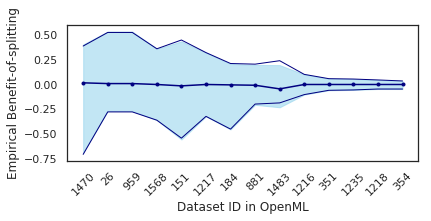

In [211]:
fig = plt.figure(figsize=(6, 3));

# for i in range(len(sample_idx)):
#     plt.plot([i, i], [lower_bound_list[sample_idx[i]], upper_bound_list[sample_idx[i]]], color='black', marker='', linestyle='--')

plt.plot(np.arange(len(sample_idx)), epsilon_list[sample_idx], color='navy', marker='o', linestyle='-', markersize=3);
plt.fill_between(np.arange(len(sample_idx)), 
                 epsilon_list[sample_idx]+lower_bound_list[sample_idx], 
                 epsilon_list[sample_idx]+upper_bound_list[sample_idx],
                 color='skyblue', alpha=.5)
plt.plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 
         color='navy', marker='', linestyle='-', linewidth=1);
plt.plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 
         color='navy', marker='', linestyle='-', linewidth=1);

plt.xticks(np.arange(len(sample_idx)), ID_list[sample_idx], rotation=45);
plt.xlabel('Dataset ID in OpenML');
plt.ylabel('Empirical Benefit-of-splitting');
plt.tight_layout()
plt.savefig('epsilon.jpg', format='jpg', dpi=300)


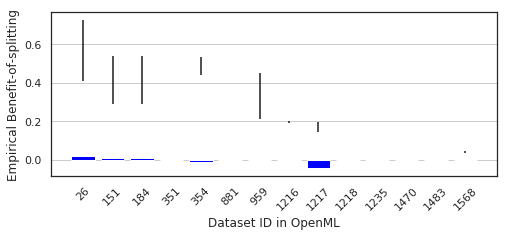

In [174]:
fig, ax = plt.subplots(figsize=(8, 3));
ax.bar(np.arange(len(sample_idx)), epsilon_list[sample_idx], yerr=yerr, color='blue');
# plt.plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 'g.');
# plt.plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 'b.');
plt.xticks(np.arange(len(sample_idx)), ID_list, rotation=45);
plt.xlabel('Dataset ID in OpenML');
plt.ylabel('Empirical Benefit-of-splitting');
ax.yaxis.grid(True)

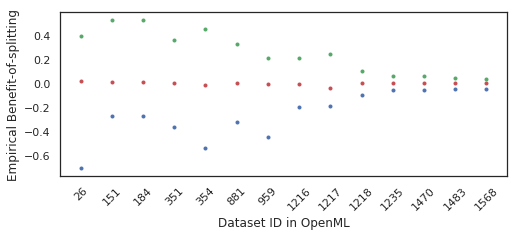

In [158]:
fig = plt.figure(figsize=(8, 3));
plt.plot(np.arange(len(sample_idx)), epsilon_list[sample_idx], 'r.');
plt.plot(np.arange(len(sample_idx)), upper_bound_list[sample_idx], 'g.');
plt.plot(np.arange(len(sample_idx)), lower_bound_list[sample_idx], 'b.');
plt.xticks(np.arange(len(sample_idx)), ID_list, rotation=45);
plt.xlabel('Dataset ID in OpenML');
plt.ylabel('Empirical Benefit-of-splitting');

In [39]:
fig = plt.figure(figsize=(15, 5));
plt.plot(epsilon_list, 'r.')
plt.plot(upper_bound_list, 'g.')
plt.plot(lower_bound_list, 'b.')
plt.ylim(-1, 1)

0.38524590163934425

In [176]:
yerr.shape

(2, 14)

In [ ]:
pickle_file = '../Shannon/datasets_parsed.pickle'
with open(pickle_file, "rb") as input_file:
    datasets = pickle.load(input_file)

idx = 21
X0, X1 = datasets[idx]["X0"], datasets[idx]["X1"]
Y0, Y1 = datasets[idx]["Y0"], datasets[idx]["Y1"]

In [142]:
epsilon_list

array([ 0.00925212, -0.01404787, -0.0039672 ,  0.        ,  0.        ,
       -0.00771417,  0.00925212,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01679104, -0.04459159,  0.        ])

In [14]:
4*np.sqrt((32+2*np.log(80))/146)

2.1135972911057626